## Natural Language Toolkit (NLTK)

**NLTK** is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to [over 50 corpora and lexical resources](http://www.nltk.org/nltk_data/) such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

http://www.nltk.org/

NLTK library documentation (reference) = *Use it to look up how to use a particular NLTK library function*
* https://www.nltk.org/api/nltk.html

---

NLTK wiki (collaboratively edited documentation):
* https://github.com/nltk/nltk/wiki

### Book: Natural Language Processing with Python 

NLTK book provides a practical introduction to programming for language processing.

Written by the creators of NLTK, it guides the reader through the fundamentals of writing Python programs, working with corpora, categorizing text, analyzing linguistic structure, and more.

Online: http://www.nltk.org/book/

* we will start with Chapter 1: ["Language Processing and Python"](http://www.nltk.org/book/ch01.html)

---

In [ ]:
# configuration for the notebook 
# %matplotlib notebook

## 1) Getting started

NLTK book: http://www.nltk.org/book/ch01.html#getting-started-with-nltk

* Loading NLTK (Python module)
* Downloading NLTK language resources (corpora, ...)


In [1]:
# In order to use a Python library, we need to import (load) it
try:
    import nltk
except ImportError:
    print("NLTK not installed. Install it with...")
    print("pip install nltk")

In [ ]:
# if not installed 
# !pip install nltk

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 15.9 MB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Let's check what NLTK version we have (for easier troubleshooting and reproducibility)
print(f"NLTK version: {nltk.__version__}")

NLTK version: 3.9.1


In [ ]:
# If your NLTK version is lower than 3.4.3 please update if possible.

# Updating in Anaconde can be done using this command: 
# conda update nltk

### nltk.Text

**`ntlk.Text` is a simple NLTK helper for loading and exploring textual content (a sequence of words / string tokens):**

... intended to support initial exploration of texts (via the interactive console). It can perform a variety of analyses on the text’s contexts (e.g., counting, concordancing, collocation discovery), and display the results.

Documentation: [nltk.Text](https://www.nltk.org/api/nltk.html#nltk.text.Text)
* lists what we can do with text once it is loaded into nltk.Text(...)

In [3]:
# Now we can try a simple example:

# we just have a list of words
my_word_list = ["This", "is", "just", "an", "example", "Another", "example", "here"]
# we create a text object from the list
my_text = nltk.Text(my_word_list)

my_text

<Text: This is just an example Another example here...>

In [4]:
type(my_text)

nltk.text.Text

In [6]:
# nltk.text.Text includes many useful functions/methods, e.g.:
# How many times does the word "example" appear?
print(f"Number of times 'example' appears: {my_text.count('example')}")

# Notes:
#  - my_text = our text, processed (loaded) by NLTK
#     - technically: a Python object
#  - my_text.count(...) = requesting the object to perform a .count(...) function and return the result
#     - technically: calling a .count() method

Number of times 'example' appears: 2


In [7]:
# count works on tokens (full words in this case)
print(f"Number of times 'exam' appears exactly: {my_text.count('exam')}")

Number of times 'exam' appears exactly: 0


## Membership check

In [10]:
'exam' in my_text

False

In [11]:
'example' in my_text

True

### Tokenizing

Let's convert a text string into nltk.Text.
First, we need to split it into tokens (to *tokenize* it). 

In [12]:
# We need to download a package containing punctuation before we can tokenize
# import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\val-
[nltk_data]     wd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
nltk.download('punkt_tab') # you should only do this once per computer or installation

[nltk_data] Downloading package punkt_tab to C:\Users\val-
[nltk_data]     wd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

## Tokenization

Tokenization is the process of splitting a string into a list of pieces or *tokens*.

Token is not necessarily a word. It can be a punctuation mark, a number, a symbol, etc.
It could be a stem (a word stem), or a lemma (a word form).

In [18]:
# Splitting text into tokens (words, ...) = tokenizing

from nltk.tokenize import word_tokenize

excerpt = """NLTK has been called “a wonderful tool for teaching, and working in, 
computational linguistics using Python,” 
and “an amazing library to play with natural language.” - said some people"""
tokens = word_tokenize(excerpt)

print(f"First fifteen tokens: {tokens[:15]}")
# compare results if you had split it with .split() instead of word_tokenize()
print(f"First fifteen naive splits: {excerpt.split()[:15]}")

First fifteen tokens: ['NLTK', 'has', 'been', 'called', '“', 'a', 'wonderful', 'tool', 'for', 'teaching', ',', 'and', 'working', 'in', ',']
First fifteen naive splits: ['NLTK', 'has', 'been', 'called', '“a', 'wonderful', 'tool', 'for', 'teaching,', 'and', 'working', 'in,', 'computational', 'linguistics', 'using']


In [20]:
# let's see data type of tokens
print(f"Data type of tokens: {type(tokens)}")
# and inside we have?
print(f"Data type of a token: {type(tokens[0])}")

Data type of tokens: <class 'list'>
Data type of a token: <class 'str'>


In [21]:
# now that I have a list of tokens, I can create a text object
# so you can pass in a list of strings
my_text2 = nltk.Text(tokens)

print(my_text2.count("NLTK"))

1


In [24]:
# what would happen if I passed in a string to nltk.Text? 
sentence = "A quick brown fox jumps over the lazy dog."
my_text3 = nltk.Text(sentence)
print(my_text3)
print(my_text3.count("fox"))
print("So the result is a bit weird, but it's not an error. It's just not what we expected.")
print("We got a sequence of characters, not words. So we need to tokenize first.")

<Text: A   q u i c k  ...>
0
So the result is a bit weird, but it's not an error. It's just not what we expected.
We got a sequence of characters, not words. So we need to tokenize first.


### Downloading NLTK language resources

NLTK also contains many language resources (corpora, ...) but you have select and download them separately (in order to save disk space and only download what is needed).

Let's download text collections used in the NLTK book: 
* `nltk.download("book")`

Note: you can also download resources interactively:
* `nltk.download()`

In [25]:
# this is a big download of all book packages
# big is a relative term, a single book is about 1 MB
# Tolstoy's War and Peace is about 5 MB
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\val-
[nltk_data]    |     wd\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to C:\Users\val-
[nltk_data]    |     wd\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to C:\Users\val-
[nltk_data]    |     wd\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to C:\Users\val-
[nltk_data]    |     wd\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to C:\Users\val-
[nltk_data]    |     wd\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to C:\Users\val-
[nltk_data]    |     

True

In [17]:
# After downloading the reources we still need to import them

# Let's import all NLTK book resource (*)
# from nltk.book import *
# generally this is not a good idea, because it will load all the books into memory
# also in general we do not want to use * in import statements
# we could import something specific, e.g. from nltk.book import text1
# better to be explicit about what we are importing
# good ide will suggest what we can import from a package
from nltk.book import text1, text2, text3, text4, text5, text6, text7, text8, text9

## 2) Exploring textual content

In [18]:
# text1, ... resources are of type nltk.Text (same as in the earlier example):

type(text1)

nltk.text.Text

In [19]:
# we could convert Text to string
# but we would lose all the functionality of nltk.Text
plain_string = " ".join(text1)
plain_string[:100]
# we can see that punctuation is not separated from the words - not optimal for analysis

'[ Moby Dick by Herman Melville 1851 ] ETYMOLOGY . ( Supplied by a Late Consumptive Usher to a Gramma'

In [20]:
# We can run all methods that nltk.Text has.

# Count words:
print(text1.count("whale"))

906


In [21]:
# https://www.nltk.org/api/nltk.html#nltk.text.Text.concordance

# Print concordance view (occurences of a word, in context):
text1.concordance("discover")

Displaying 7 of 7 matches:
cean , in order , if possible , to discover a passage through it to India , th
 throw at the whales , in order to discover when they were nigh enough to risk
for ever reach new distances , and discover sights more sweet and strange than
gs upon the plain , you will often discover images as of the petrified forms o
 over numberless unknown worlds to discover his one superficial western one ; 
se two heads for hours , and never discover that organ . The ear has no extern
s keener than man ' s ; Ahab could discover no sign in the sea . But suddenly 


In [22]:
text1.concordance("Ahab", lines=10, width=100)

Displaying 10 of 511 matches:
haling is , eh ? Have ye clapped eye on Captain Ahab ?" " Who is Captain Ahab , sir ?" " Aye , aye ,
clapped eye on Captain Ahab ?" " Who is Captain Ahab , sir ?" " Aye , aye , I thought so . Captain A
b , sir ?" " Aye , aye , I thought so . Captain Ahab is the Captain of this ship ." " I am mistaken 
 to it , past backing out . Clap eye on Captain Ahab , young man , and thou wilt find that he has on
ccosted Captain Peleg , inquiring where Captain Ahab was to be found . " And what dost thou want of 
be found . " And what dost thou want of Captain Ahab ? It ' s all right enough ; thou art shipped ."
ose he will thee . He ' s a queer man , Captain Ahab -- so some think -- but a good one . Oh , thou 
 s a grand , ungodly , god - like man , Captain Ahab ; doesn ' t speak much ; but , when he does spe
you may well listen . Mark ye , be forewarned ; Ahab ' s above the common ; Ahab ' s been in college
e , be forewarned ; Ahab ' s above the common ; Ahab ' s been

In [23]:
text4.concordance("nation")

Displaying 25 of 330 matches:
 to the character of an independent nation seems to have been distinguished by
f Heaven can never be expected on a nation that disregards the eternal rules o
first , the representatives of this nation , then consisting of little more th
, situation , and relations of this nation and country than any which had ever
, prosperity , and happiness of the nation I have acquired an habitual attachm
an be no spectacle presented by any nation more pleasing , more noble , majest
party for its own ends , not of the nation for the national good . If that sol
tures and the people throughout the nation . On this subject it might become m
if a personal esteem for the French nation , formed in a residence of seven ye
f our fellow - citizens by whatever nation , and if success can not be obtaine
y , continue His blessing upon this nation and its Government and give it all 
powers so justly inspire . A rising nation , spread over a wide and fruitful l
ing now decided by the

In [24]:
# let's save results of our concordance search
results = text4.concordance("nation") # it will still print the results
type(results) # so there are no results - concordance() returns None
# concorance is meant to be used for printing, not for saving results - exploration tool

Displaying 25 of 330 matches:
 to the character of an independent nation seems to have been distinguished by
f Heaven can never be expected on a nation that disregards the eternal rules o
first , the representatives of this nation , then consisting of little more th
, situation , and relations of this nation and country than any which had ever
, prosperity , and happiness of the nation I have acquired an habitual attachm
an be no spectacle presented by any nation more pleasing , more noble , majest
party for its own ends , not of the nation for the national good . If that sol
tures and the people throughout the nation . On this subject it might become m
if a personal esteem for the French nation , formed in a residence of seven ye
f our fellow - citizens by whatever nation , and if success can not be obtaine
y , continue His blessing upon this nation and its Government and give it all 
powers so justly inspire . A rising nation , spread over a wide and fruitful l
ing now decided by the

NoneType

In [45]:
# let's build our own function to save results
def concordance_save(text, word, filename, left_tokens=5, right_tokens=5):
    # we just need index of the word
    # we can use enumerate() to get index and token
    # we can use range() to get index
    # we can use len() to get length of the text
    # we can use text.index() to get index of the word
    # we can use text.tokens to get list of tokens
    # we can use text.tokens[index] to get token at index
    # we can use text.tokens[index - left_tokens:index + right_tokens] to get context
    # we can use " ".join() to join list of tokens into a string
    # we can use open() to open a file
    # we can use file.write() to write a string to a file
    # we can use file.close() to close a file
    # we can use with open() as file: to open a file, write to it and close it
    # we can use print() to print a string

    # first let us count how many times the word appears in the text
    count = text.count(word)
    print(f"Found {count} occurences of {word} in {filename}")
    # we are guaranteed to have at count occurences of the word
    result_list = []
    index = 0
    offset = 0
    for _ in range(count):
        # we need to get index of the word
        index = text.tokens[offset:].index(word) # TODO check this
        # print(f"Found {word} at index {index}")
        # we need to get context
        context = text.tokens[offset+index - left_tokens:offset+index + right_tokens]
        # we need to join context into a string
        context_string = " ".join(context)
        # we need to add context_string to the result_list
        result_list.append(context_string)
        offset += index + 1 # we do not want the same index again
    # we need to open a file
    with open(filename, "w") as file:
        # we need to write results to the file
        for result in result_list:
            file.write(result + "\n")
    # we need to print a message
    print(f"Saved {count} results to {filename}")
    return result_list


In [46]:
concordance_save(text4, "nation", "nation.txt")

Found 243 occurences of nation in nation.txt
Saved 243 results to nation.txt


['the character of an independent nation seems to have been',
 'never be expected on a nation that disregards the eternal',
 ', the representatives of this nation , then consisting of',
 ', and relations of this nation and country than any',
 ', and happiness of the nation I have acquired an',
 'no spectacle presented by any nation more pleasing , more',
 'ends , not of the nation for the national good',
 'and the people throughout the nation . On this subject',
 'personal esteem for the French nation , formed in a',
 'fellow - citizens by whatever nation , and if success',
 'continue His blessing upon this nation and its Government and',
 'justly inspire . A rising nation , spread over a',
 'by the voice of the nation , announced according to',
 'the fact that a just nation is trusted on its',
 'opinion which gives to a nation the blessing of harmony',
 'of a free and virtuous nation , would under any',
 'and united councils of the nation will be safeguards to',
 'the war with a power

In [49]:
# https://www.nltk.org/api/nltk.html#nltk.text.Text.similar

# Print words that appear in similar context as "nation".
text4.similar("nation")

country people government world union time constitution states
republic land law earth other future party peace strength president
way war


## Similarity search

There are various ways to find similar words in a text.
We would use different methods depending on what we want to achieve.

For example, we can find words that appear in a similar context (i.e. words that appear in similar contexts are likely to have similar meaning).

In [50]:
# https://www.nltk.org/api/nltk.html#nltk.text.Text.common_contexts

# Find contexts common to all given words
text1.common_contexts(["day", "night"])


that_, the_, by_, a_, that_; the_previous -_, one_, all_. the_before
every_, by_or of_; of_. the_. this_in all_in after_, the_wore
through_into


### Side note: Python lists

A *list* contains multiple values in an ordered sequence.

More about Python lists:
* https://automatetheboringstuff.com/chapter4/

In [ ]:
# nltk.Text is also a list - can do everything we can do with lists (access parts of it, ...)

# What's the 1st occurence of "He" in the text?
#  - note: Python is case sensitive (unless you take care of it - e.g. convert all text to lowercase)

print(text1.index("He"))

In [47]:
# The word at position #42
#  - note: list indexes start from 0

print(text1[42])

He


In [48]:
print(text1[42:52])

['He', 'was', 'ever', 'dusting', 'his', 'old', 'lexicons', 'and', 'grammars', ',']


## Further exploration

* Dispersion plots (distribution of words throughout the text)
* Generating text (based on example)

### Visualizing the corpus

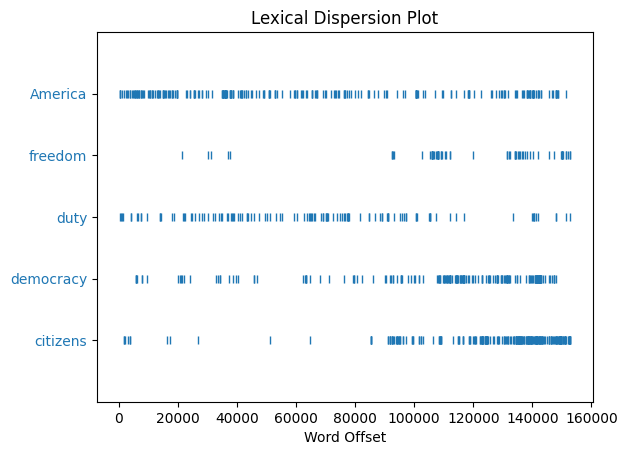

In [51]:
# Dispersion plot

# https://www.nltk.org/api/nltk.html#nltk.text.Text.dispersion_plot
# we show where in corpus the words appear

# source: Inaugural Address Corpus
text4.dispersion_plot(["citizens", "democracy", "duty", "freedom", "America"])

In [52]:
help(text4.dispersion_plot)

Help on method dispersion_plot in module nltk.text:

dispersion_plot(words) method of nltk.text.Text instance
    Produce a plot showing the distribution of the words through the text.
    Requires pylab to be installed.
    
    :param words: The words to be plotted
    :type words: list(str)
    :seealso: nltk.draw.dispersion_plot()



### Generating text

Note: depending on your version of NLTK `generate()` functionality may or may not work (NLTK version 3.7.4 or newer is required).
* In case it does not work, please see subsection "Saved version of generate() results".



In [53]:
# Generate text (based on example)
# https://www.nltk.org/api/nltk.html#nltk.text.Text.generate

# we need to supply seed words
text1.generate(text_seed = ["Why", "is", "it"])

Building ngram index...


Why is it stripped off from some mountain torrent we had flip ? , so as to
preserve all his might had in former years abounding with them , they
toil with their lances , strange tales of Southern whaling .
conceivable that this fine old Dutch Fishery , a most wealthy example
of the sea - captain orders me to admire the magnanimity of the whole
, and many whalemen , but dumplings ; good white cedar of the ship
casts off her cables ; and chewed it noiselessly ; and though there
are birds called grey albatrosses ; and yet faster


'Why is it stripped off from some mountain torrent we had flip ? , so as to\npreserve all his might had in former years abounding with them , they\ntoil with their lances , strange tales of Southern whaling .\nconceivable that this fine old Dutch Fishery , a most wealthy example\nof the sea - captain orders me to admire the magnanimity of the whole\n, and many whalemen , but dumplings ; good white cedar of the ship\ncasts off her cables ; and chewed it noiselessly ; and though there\nare birds called grey albatrosses ; and yet faster'

In [54]:
text4.generate(text_seed = ["Morning", "in", "America"])

Building ngram index...


Morning in America today in order and peace are interlocked with the Constitution . ' s
children . . , at another Inaugural , thousands of families are gone .
work to do their share of the whole . -- in receiving counsel -- in a
manner as I could say " you " and all industries in this winter of our
own life . and I shall deem it better to be undisturbed , the people
-- enlisted not only because slavery existed in some ] existed
domestic institutions existing in other parts of the United States
have been exchanged , has


'Morning in America today in order and peace are interlocked with the Constitution . \' s\nchildren . . , at another Inaugural , thousands of families are gone .\nwork to do their share of the whole . -- in receiving counsel -- in a\nmanner as I could say " you " and all industries in this winter of our\nown life . and I shall deem it better to be undisturbed , the people\n-- enlisted not only because slavery existed in some ] existed\ndomestic institutions existing in other parts of the United States\nhave been exchanged , has'

---

**NLTK `generate()` builds a [trigram] language model from the supplied text** (words are generated based on previous two words).

For more information see nltk.lm: https://www.nltk.org/api/nltk.lm.html

**Saved version of `generate()` results:**
    
`text1.generate(text_seed = ["Why", "is", "it"])`

*Building ngram index...*

```
Why is it stripped off from some mountain torrent we had flip ? , so as to
preserve all his might had in former years abounding with them , they
toil with their lances , strange tales of Southern whaling .
conceivable that this fine old Dutch Fishery , a most wealthy example
of the sea - captain orders me to admire the magnanimity of the whole
, and many whalemen , but dumplings ; good white cedar of the ship
casts off her cables ; and chewed it noiselessly ; and though there
are birds called grey albatrosses ; and yet faster
```


In [ ]:
help(text1.generate)

---

## Your turn!

Choose some text and **explore it using NLTK** (following the examples in this notebook).

**Write code in notebook cells below**.
* add more cells (use "+" icon) if necessary

You may use NLTK text corpora or load your own text.